In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist, cosine
from scipy.ndimage import convolve1d
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from joblib import Parallel, delayed
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

import pandas as pd
import xarray as xr
from netCDF4 import Dataset, num2date, date2num
from datetime import datetime, timedelta
import os

import seaborn as sns
import cmocean as cmocn

%matplotlib inline

In [2]:
fname = '../generalStatistics/goodData_QSwithTAO_with2hrStatsConv.nc'
ds = xr.open_dataset(fname)
ds['mean_WVEL'] = np.sqrt(ds['mean_U10N_x'] **2 + ds['mean_U10N_y']**2)
data = ds.to_dataframe()

df = data.copy()

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

Text(0.1, 0.95, 'B')

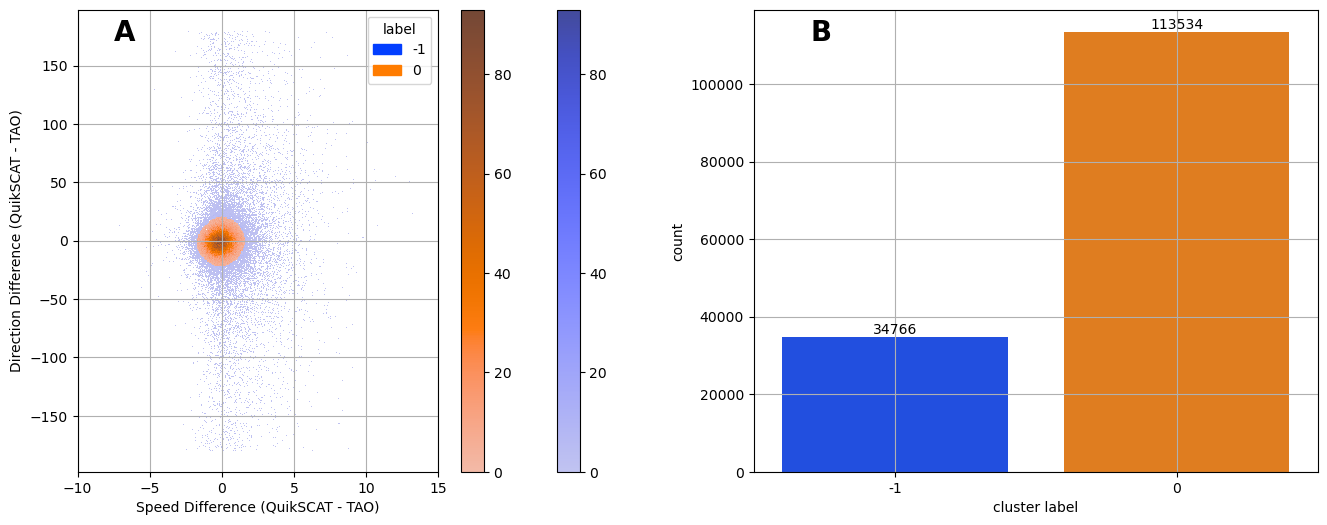

In [3]:
selectX = ['Speed Difference (QuikSCAT - TAO)',
          'cos(Direction Difference (QuikSCAT - TAO))',
          'sin(Direction Difference (QuikSCAT - TAO))']


X = df[selectX]

normX = (X - X.mean(axis=0))/ X.std(axis=0)

# kmeans = KMeans(n_clusters=9, random_state=0, n_init="auto", max_iter = 10000).fit(normX)
# df['label'] = kmeans.labels_

dbscan = DBSCAN(eps=0.15, min_samples= 500)
df['label'] = dbscan.fit_predict(normX)

# optics = OPTICS(min_samples=50 ) #cluster_method='dbscan', eps=0.25)
# df['label'] = optics.fit_predict(normX)

fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

ax = axes[0]
# ax.remove()  # Remove the existing second subplot
# ax = fig.add_subplot(121, projection='polar')
xlabel = 'Speed Difference (QuikSCAT - TAO)'
ylabel = 'Direction Difference (QuikSCAT - TAO)'

s = sns.histplot(df, x=xlabel, y = ylabel,#levels=10, 
                hue='label', common_norm=True, cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

ax.grid(visible=True, which='both', axis='both')

ax.text(0.1, 0.95, 'A', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)

ax.set_xlim(-10,15)

ax = axes[1]
s = sns.countplot(df, x='label',palette = sns.color_palette("bright"), ax = ax)
s.bar_label(s.containers[0])

ax.grid(visible=True, which='both', axis='both')
ax.set_xlabel('cluster label')
#ax.set_ylabel('cluster label')

ax.text(0.1, 0.95, 'B', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)


#plt.savefig('PDF_byCluster_10min.png', dpi=100)

In [4]:
# Filter rows where 'label' is -1
subDF = df.loc[df['label'].isin([-1])]

# Create a boolean mask for high wind speeds
highWinds = subDF['Neutral Wind Speed at 10m (TAO)'] > 2

# Apply the filter correctly using .loc
subDF = subDF.loc[highWinds]
subDF['SST-AIRT'] = subDF['Sea Surface Temperature (TAO)'] - subDF['Air Temperature (TAO)']

In [5]:
Xheadings = ['std_cosWDIR', 
            'std_sinWDIR',
            'SST-AIRT',
            'mean_SST - AIRT',
            'std_SST - AIRT', 
            'Relative Humidity (TAO)',             
            'mean_RELH',             
            'mean_SST',
            'std_AIRT',
            'std_SST', 
            'mean_AIRT',
            'std_RELH',
            'Neutral Wind Speed at 10m (TAO)',
            'std_WSPD', 
            'mean_WSPD',
            'mean_WSPD_10N',
            'std_WSPD_10N',
           ]


Yheadings = ['Speed Difference (QuikSCAT - TAO)',
             'cos(Direction Difference (QuikSCAT - TAO))',
             'sin(Direction Difference (QuikSCAT - TAO))']

In [6]:


X = subDF[Xheadings]
Y = subDF[Yheadings]

X = X.rename(columns=lambda x: x.replace(" ", "_"))
Y = Y.rename(columns=lambda x: x.replace(" ", "_"))

In [7]:
Y.head()

,Speed_Difference_(QuikSCAT_-_TAO),cos(Direction_Difference_(QuikSCAT_-_TAO)),sin(Direction_Difference_(QuikSCAT_-_TAO))
count,,,
5,0.660424,0.922598,0.385763
6,0.815122,0.893371,0.449319
9,-0.471795,0.926021,-0.377472
27,1.019817,0.800180,-0.599760
89,-0.174220,0.925476,-0.378806


In [8]:



# Generate interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interactions = poly.fit_transform(X)

# Fit regression with interaction terms
model_inter = LinearRegression()
model_inter.fit(X_interactions, Y)

# Extract feature names and coefficients
feature_names = poly.get_feature_names_out(X.columns)
M_inter = model_inter.coef_

# Create DataFrame for interpretation
coef_df_inter = pd.DataFrame(M_inter, columns=feature_names, index=Yheadings)

#tools.display_dataframe_to_user(name="Coefficient Matrix with Interactions", dataframe=coef_df_inter)

from IPython.core.display import display, HTML

# Convert to HTML and display in Jupyter Notebook
display(HTML(coef_df_inter.to_html()))

/tmp/ipykernel_2397744/1015593585.py:18: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


,std_cosWDIR,std_sinWDIR,SST-AIRT,mean_SST_-_AIRT,std_SST_-_AIRT,Relative_Humidity_(TAO),mean_RELH,mean_SST,std_AIRT,std_SST,mean_AIRT,std_RELH,Neutral_Wind_Speed_at_10m_(TAO),std_WSPD,mean_WSPD,mean_WSPD_10N,std_WSPD_10N,std_cosWDIR std_sinWDIR,std_cosWDIR SST-AIRT,std_cosWDIR mean_SST_-_AIRT,std_cosWDIR std_SST_-_AIRT,std_cosWDIR Relative_Humidity_(TAO),std_cosWDIR mean_RELH,std_cosWDIR mean_SST,std_cosWDIR std_AIRT,std_cosWDIR std_SST,std_cosWDIR mean_AIRT,std_cosWDIR std_RELH,std_cosWDIR Neutral_Wind_Speed_at_10m_(TAO),std_cosWDIR std_WSPD,std_cosWDIR mean_WSPD,std_cosWDIR mean_WSPD_10N,std_cosWDIR std_WSPD_10N,std_sinWDIR SST-AIRT,std_sinWDIR mean_SST_-_AIRT,std_sinWDIR std_SST_-_AIRT,std_sinWDIR Relative_Humidity_(TAO),std_sinWDIR mean_RELH,std_sinWDIR mean_SST,std_sinWDIR std_AIRT,std_sinWDIR std_SST,std_sinWDIR mean_AIRT,std_sinWDIR std_RELH,std_sinWDIR Neutral_Wind_Speed_at_10m_(TAO),std_sinWDIR std_WSPD,std_sinWDIR mean_WSPD,std_sinWDIR mean_WSPD_10N,std_sinWDIR std_WSPD_10N,SST-AIRT mean_SST_-_AIRT,SST-AIRT std_SST_-_AIRT,SST-AIRT Relative_Humidity_(TAO),SST-AIRT mean_RELH,SST-AIRT mean_SST,SST-AIRT std_AIRT,SST-AIRT std_SST,SST-AIRT mean_AIRT,SST-AIRT std_RELH,SST-AIRT Neutral_Wind_Speed_at_10m_(TAO),SST-AIRT std_WSPD,SST-AIRT mean_WSPD,SST-AIRT mean_WSPD_10N,SST-AIRT std_WSPD_10N,mean_SST_-_AIRT std_SST_-_AIRT,mean_SST_-_AIRT Relative_Humidity_(TAO),mean_SST_-_AIRT mean_RELH,mean_SST_-_AIRT mean_SST,mean_SST_-_AIRT std_AIRT,mean_SST_-_AIRT std_SST,mean_SST_-_AIRT mean_AIRT,mean_SST_-_AIRT std_RELH,mean_SST_-_AIRT Neutral_Wind_Speed_at_10m_(TAO),mean_SST_-_AIRT std_WSPD,mean_SST_-_AIRT mean_WSPD,mean_SST_-_AIRT mean_WSPD_10N,mean_SST_-_AIRT std_WSPD_10N,std_SST_-_AIRT Relative_Humidity_(TAO),std_SST_-_AIRT mean_RELH,std_SST_-_AIRT mean_SST,std_SST_-_AIRT std_AIRT,std_SST_-_AIRT std_SST,std_SST_-_AIRT mean_AIRT,std_SST_-_AIRT std_RELH,std_SST_-_AIRT Neutral_Wind_Speed_at_10m_(TAO),std_SST_-_AIRT std_WSPD,std_SST_-_AIRT mean_WSPD,std_SST_-_AIRT mean_WSPD_10N,std_SST_-_AIRT std_WSPD_10N,Relative_Humidity_(TAO) mean_RELH,Relative_Humidity_(TAO) mean_SST,Relative_Humidity_(TAO) std_AIRT,Relative_Humidity_(TAO) std_SST,Relative_Humidity_(TAO) mean_AIRT,Relative_Humidity_(TAO) std_RELH,Relative_Humidity_(TAO) Neutral_Wind_Speed_at_10m_(TAO),Relative_Humidity_(TAO) std_WSPD,Relative_Humidity_(TAO) mean_WSPD,Relative_Humidity_(TAO) mean_WSPD_10N,Relative_Humidity_(TAO) std_WSPD_10N,mean_RELH mean_SST,mean_RELH std_AIRT,mean_RELH std_SST,mean_RELH mean_AIRT,mean_RELH std_RELH,mean_RELH Neutral_Wind_Speed_at_10m_(TAO),mean_RELH std_WSPD,mean_RELH mean_WSPD,mean_RELH mean_WSPD_10N,mean_RELH std_WSPD_10N,mean_SST std_AIRT,mean_SST std_SST,mean_SST mean_AIRT,mean_SST std_RELH,mean_SST Neutral_Wind_Speed_at_10m_(TAO),mean_SST std_WSPD,mean_SST mean_WSPD,mean_SST mean_WSPD_10N,mean_SST std_WSPD_10N,std_AIRT std_SST,std_AIRT mean_AIRT,std_AIRT std_RELH,std_AIRT Neutral_Wind_Speed_at_10m_(TAO),std_AIRT std_WSPD,std_AIRT mean_WSPD,std_AIRT mean_WSPD_10N,std_AIRT std_WSPD_10N,std_SST mean_AIRT,std_SST std_RELH,std_SST Neutral_Wind_Speed_at_10m_(TAO),std_SST std_WSPD,std_SST mean_WSPD,std_SST mean_WSPD_10N,std_SST std_WSPD_10N,mean_AIRT std_RELH,mean_AIRT Neutral_Wind_Speed_at_10m_(TAO),mean_AIRT std_WSPD,mean_AIRT mean_WSPD,mean_AIRT mean_WSPD_10N,mean_AIRT std_WSPD_10N,std_RELH Neutral_Wind_Speed_at_10m_(TAO),std_RELH std_WSPD,std_RELH mean_WSPD,std_RELH mean_WSPD_10N,std_RELH std_WSPD_10N,Neutral_Wind_Speed_at_10m_(TAO) std_WSPD,Neutral_Wind_Speed_at_10m_(TAO) mean_WSPD,Neutral_Wind_Speed_at_10m_(TAO) mean_WSPD_10N,Neutral_Wind_Speed_at_10m_(TAO) std_WSPD_10N,std_WSPD mean_WSPD,std_WSPD mean_WSPD_10N,std_WSPD std_WSPD_10N,mean_WSPD mean_WSPD_10N,mean_WSPD std_WSPD_10N,mean_WSPD_10N std_WSPD_10N
Speed Difference (QuikSCAT - TAO),2.762974,-10.932688,-4.427448,21241.133191,27.691335,0.417652,-0.864612,-21239.223914,-22.834405,-32.513474,21237.753940,-0.934938,-3.087536,-41.357695,32.484132,-27.612277,38.980814,-0.993512,-0.097772,-3730

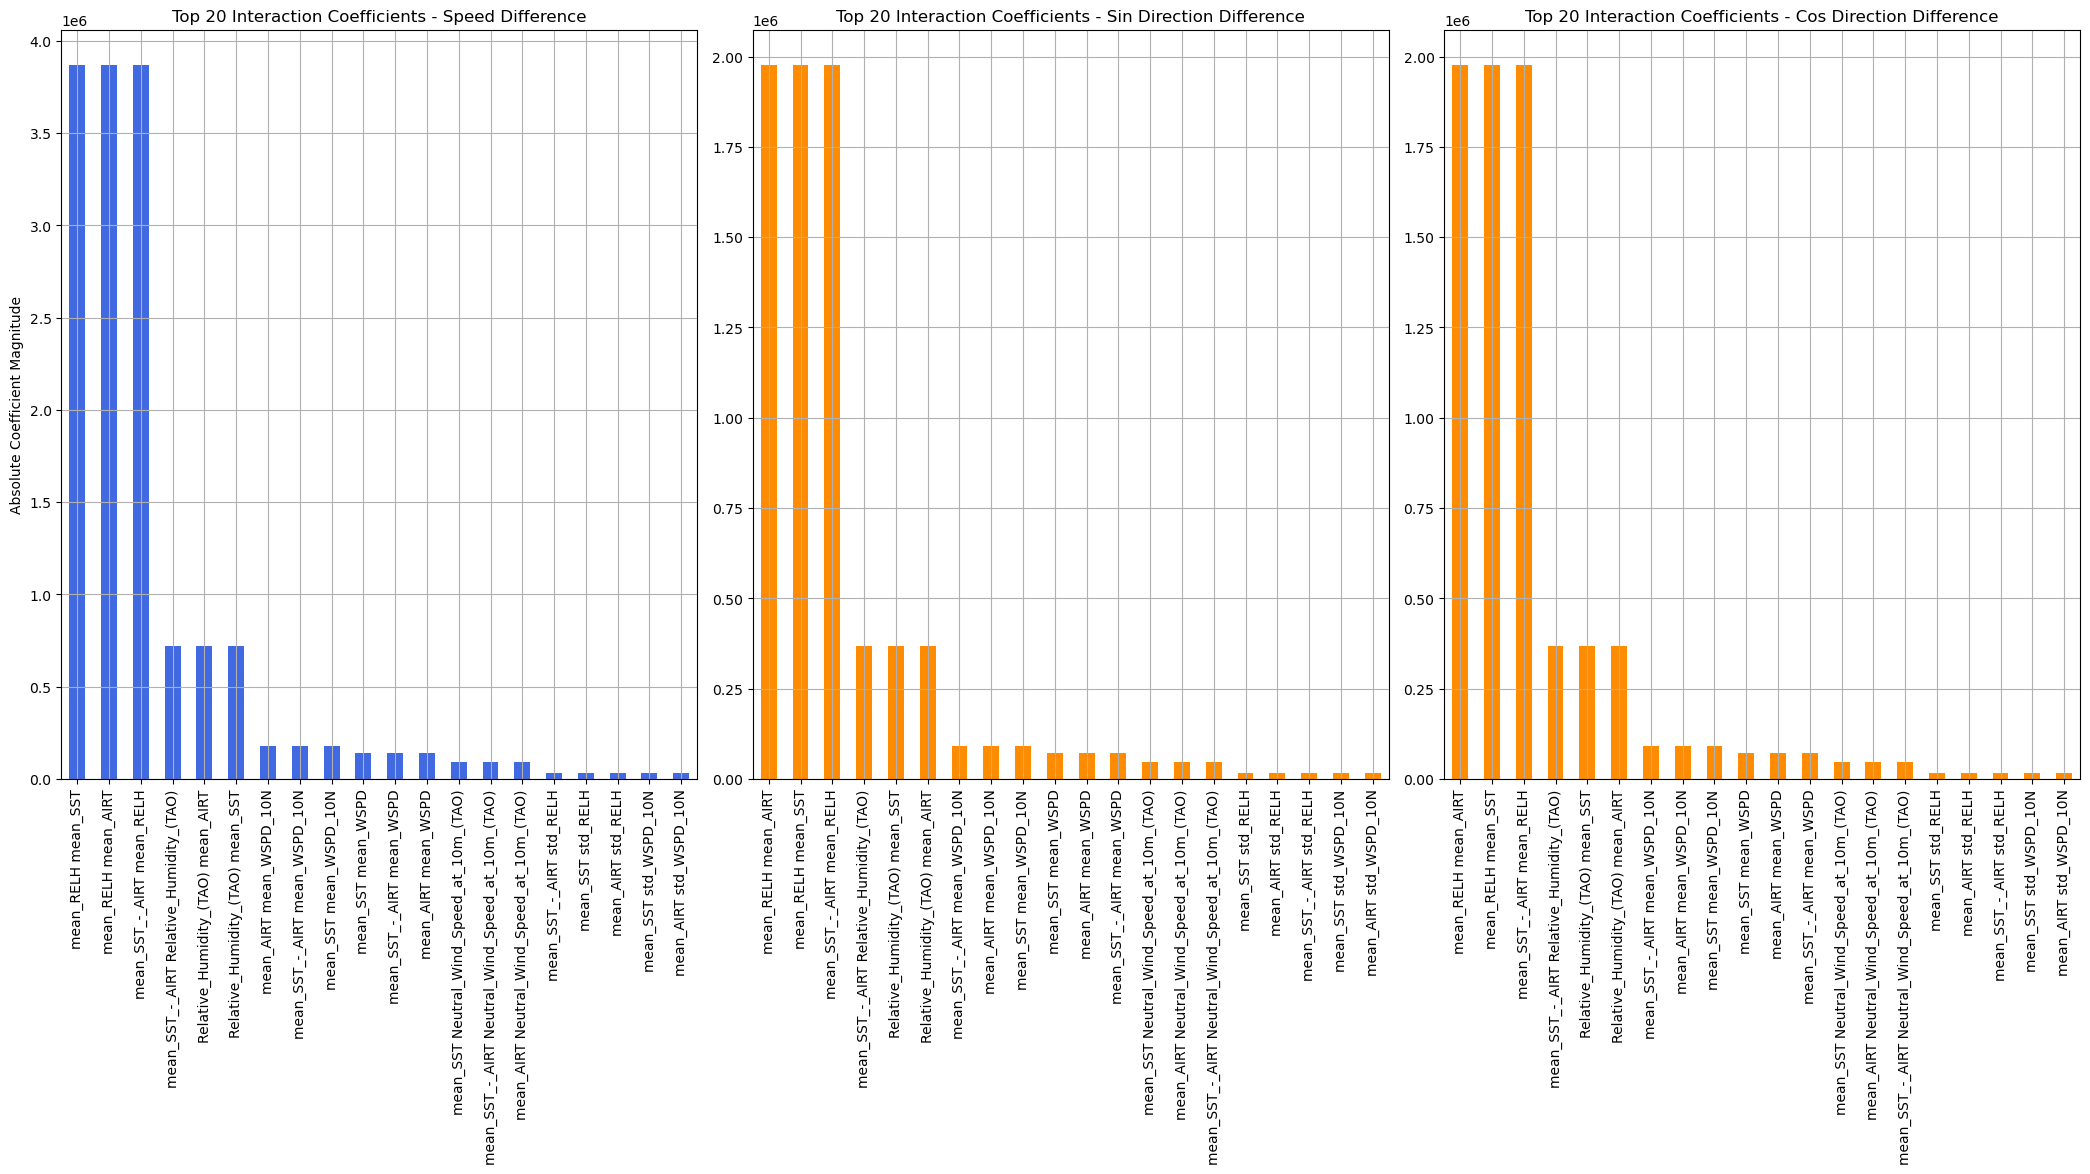

In [9]:
# Extract absolute values and sort separately for Speed Difference and Direction Difference
top_speed_diff = coef_df_inter.loc['Speed Difference (QuikSCAT - TAO)'].abs().sort_values(ascending=False).head(20)
top_cos_direction_diff = coef_df_inter.loc['cos(Direction Difference (QuikSCAT - TAO))'].abs().sort_values(ascending=False).head(20)
top_sin_direction_diff = coef_df_inter.loc['sin(Direction Difference (QuikSCAT - TAO))'].abs().sort_values(ascending=False).head(20)

# Convert to DataFrames for better readability
top_speed_diff_df = pd.DataFrame(top_speed_diff, columns=['Absolute Coefficient Value'])
top_cos_direction_diff_df = pd.DataFrame(top_cos_direction_diff, columns=['Absolute Coefficient Value'])
top_sin_direction_diff_df = pd.DataFrame(top_sin_direction_diff, columns=['Absolute Coefficient Value'])

# Display the top 20 interactions for each target separately
fig, axes = plt.subplots(1, 3, figsize=(21, 12))

# Speed Difference
top_speed_diff.plot(kind='bar', color='royalblue', ax=axes[0])
axes[0].set_title("Top 20 Interaction Coefficients - Speed Difference")
axes[0].set_ylabel("Absolute Coefficient Magnitude")
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid()

# Direction Difference
top_sin_direction_diff.plot(kind='bar', color='darkorange', ax=axes[1])
axes[1].set_title("Top 20 Interaction Coefficients - Sin Direction Difference")
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid()

# Direction Difference
top_sin_direction_diff.plot(kind='bar', color='darkorange', ax=axes[2])
axes[2].set_title("Top 20 Interaction Coefficients - Cos Direction Difference")
axes[2].tick_params(axis='x', rotation=90)
axes[2].grid()

# Show the plots
plt.tight_layout()
plt.show()


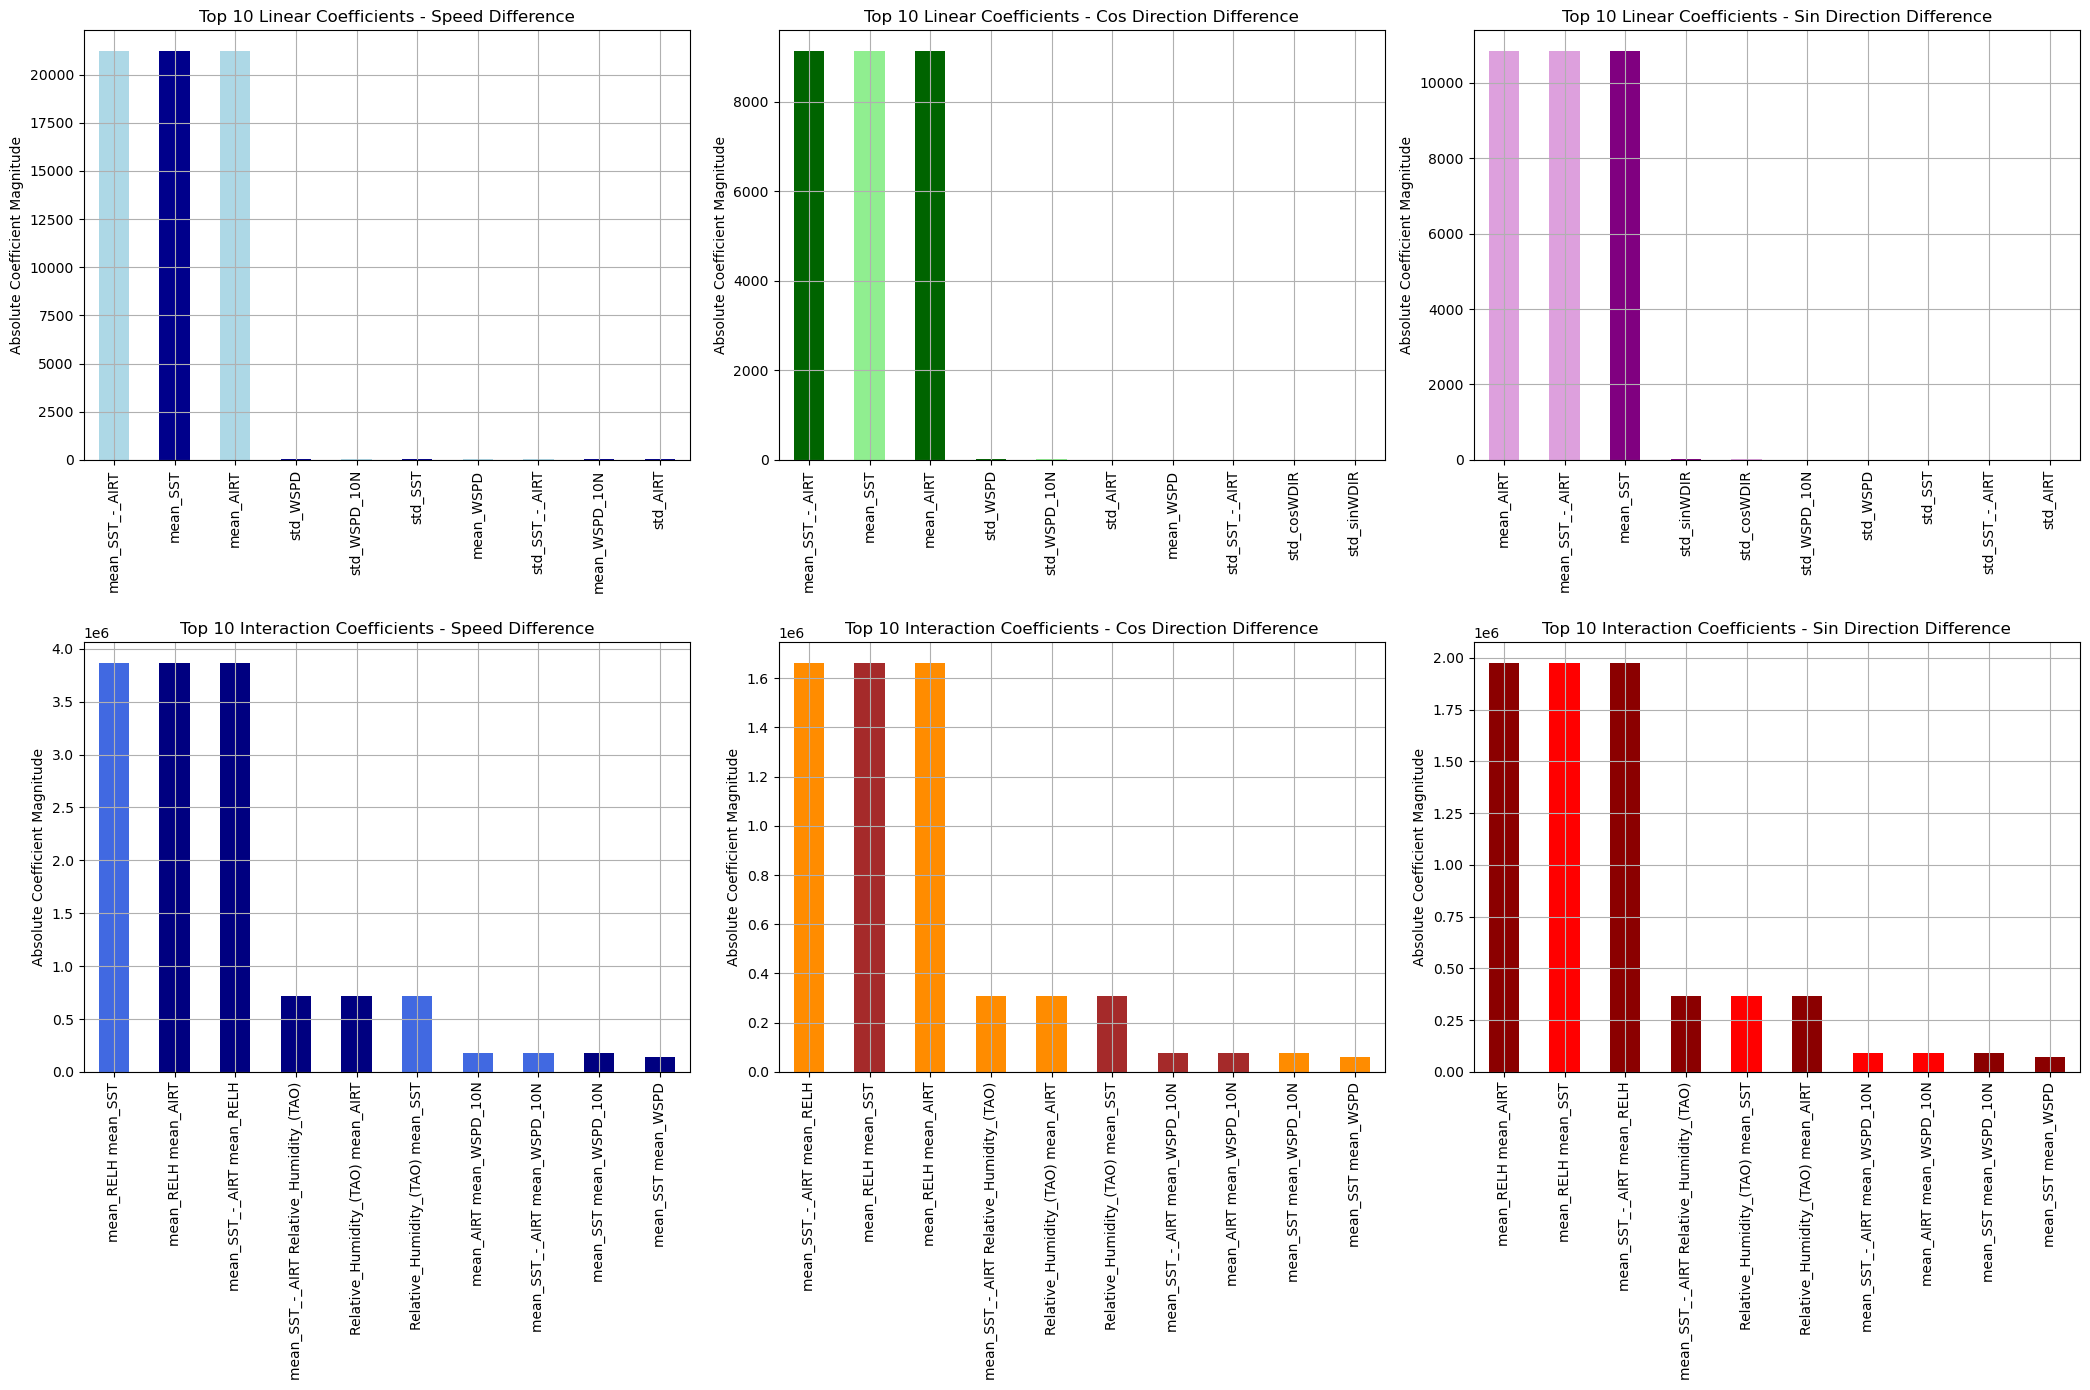

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract absolute values of coefficients
coef_abs = coef_df_inter.abs()

# Identify original features (linear terms)
original_features = list(X.columns)  # Convert set to list

# Separate linear and interaction coefficients
linear_coef_df = coef_df_inter[original_features]  # Keep only linear terms
interaction_coef_df = coef_df_inter.drop(columns=original_features)  # Keep only interaction terms

# Function to plot coefficients with color adjustment for negatives
def plot_coefficients(ax, coef_series, title, light_color, dark_color):
    abs_values = coef_series.abs()  # Plot absolute values
    colors = [dark_color if coef_series[name] < 0 else light_color for name in coef_series.index]
    abs_values.plot(kind='bar', color=colors, ax=ax)
    ax.set_title(title)
    ax.set_ylabel("Absolute Coefficient Magnitude")
    ax.tick_params(axis='x', rotation=90)
    ax.grid()

# Extract top 10 linear coefficients
top_linear_speed_diff = linear_coef_df.loc['Speed Difference (QuikSCAT - TAO)'].sort_values(key=abs, ascending=False).head(10)
top_linear_cos_direction_diff = linear_coef_df.loc['cos(Direction Difference (QuikSCAT - TAO))'].sort_values(key=abs, ascending=False).head(10)
top_linear_sin_direction_diff = linear_coef_df.loc['sin(Direction Difference (QuikSCAT - TAO))'].sort_values(key=abs, ascending=False).head(10)

# Extract top 10 interaction coefficients
top_interaction_speed_diff = interaction_coef_df.loc['Speed Difference (QuikSCAT - TAO)'].sort_values(key=abs, ascending=False).head(10)
top_interaction_cos_direction_diff = interaction_coef_df.loc['cos(Direction Difference (QuikSCAT - TAO))'].sort_values(key=abs, ascending=False).head(10)
top_interaction_sin_direction_diff = interaction_coef_df.loc['sin(Direction Difference (QuikSCAT - TAO))'].sort_values(key=abs, ascending=False).head(10)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(21, 14))

# --- Plot Top 10 Linear Coefficients ---
plot_coefficients(axes[0, 0], top_linear_speed_diff, "Top 10 Linear Coefficients - Speed Difference", "lightblue", "darkblue")
plot_coefficients(axes[0, 1], top_linear_cos_direction_diff, "Top 10 Linear Coefficients - Cos Direction Difference", "lightgreen", "darkgreen")
plot_coefficients(axes[0, 2], top_linear_sin_direction_diff, "Top 10 Linear Coefficients - Sin Direction Difference", "plum", "purple")

# --- Plot Top 10 Interaction Coefficients ---
plot_coefficients(axes[1, 0], top_interaction_speed_diff, "Top 10 Interaction Coefficients - Speed Difference", "royalblue", "navy")
plot_coefficients(axes[1, 1], top_interaction_cos_direction_diff, "Top 10 Interaction Coefficients - Cos Direction Difference", "darkorange", "brown")
plot_coefficients(axes[1, 2], top_interaction_sin_direction_diff, "Top 10 Interaction Coefficients - Sin Direction Difference", "red", "darkred")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


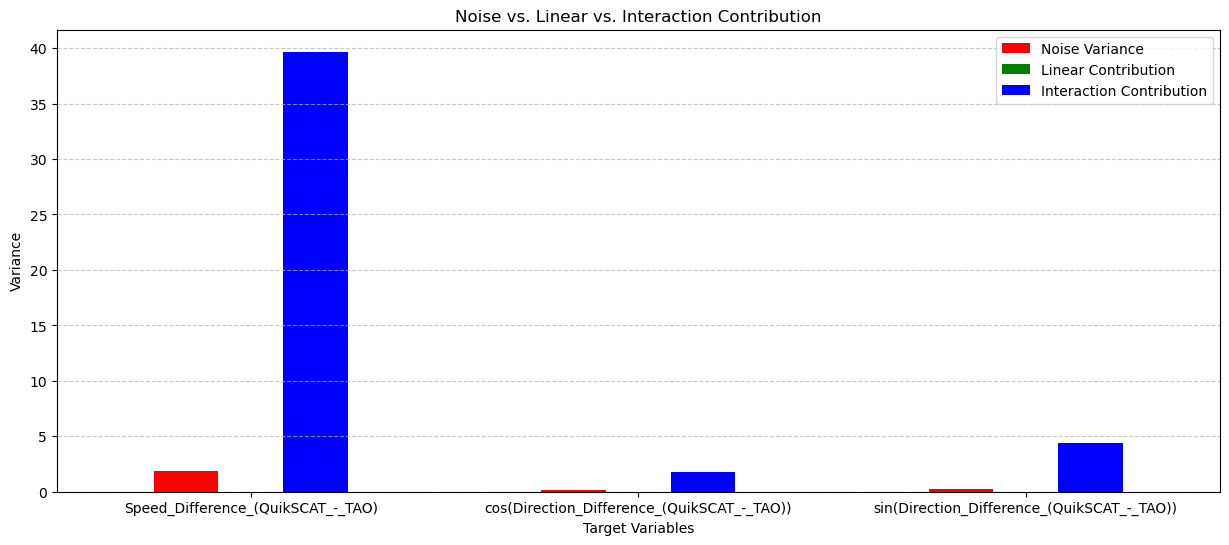

In [11]:
# Identify original feature names
original_features = list(X.columns)  # Convert to list

# Identify interaction terms by excluding original features
interaction_feature_names = [name for name in feature_names if name not in original_features]

# Get the indices of interaction terms in `X_interactions`
interaction_indices = [i for i, name in enumerate(feature_names) if name in interaction_feature_names]

# Extract only interaction terms from `X_interactions`
X_interactions_only = X_interactions[:, interaction_indices]  # Keep only interaction columns

# Extract B (interaction coefficients)
B_df = coef_df_inter[interaction_feature_names]  # Keep only interaction coefficients
B_matrix = B_df.values  # Convert to NumPy array

# Extract A (linear coefficients) from the coefficient matrix
A_df = coef_df_inter[X.columns]  # Keep only linear terms
A_matrix = A_df.values  # Convert to NumPy array

# Compute linear effects contribution
linear_effects = X @ A_matrix.T  # Compute A X
linear_variance = np.var(linear_effects, axis=0)

interaction_effects = X_interactions_only @ B_matrix.T  # Compute B (X x X)
interaction_variance = np.var(interaction_effects, axis=0)

# Predict Y using the regression model with interactions
Y_pred = model_inter.predict(X_interactions)

# Compute residuals (noise)
residuals = Y - Y_pred

# Compute variance of residuals (Noise Contribution)
noise_variance = np.var(residuals, axis=0)  # Compute variance across samples

# Create DataFrame to compare noise, linear, and interaction variances
variance_df = pd.DataFrame({
    "Noise Variance": noise_variance,
    "Linear Variance": linear_variance,
    "Interaction Variance": interaction_variance
}, index=Y.columns)

# Display results
#import ace_tools as tools
#tools.display_dataframe_to_user(name="Noise vs. Linear vs. Interaction Contribution", dataframe=variance_df)

# Plot results
variance_df.plot(kind='bar', figsize=(15, 6), color=['red', 'green', 'blue'])
plt.title("Noise vs. Linear vs. Interaction Contribution")
plt.ylabel("Variance")
plt.xlabel("Target Variables")
plt.xticks(rotation=0)
plt.legend(["Noise Variance", "Linear Contribution", "Interaction Contribution"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

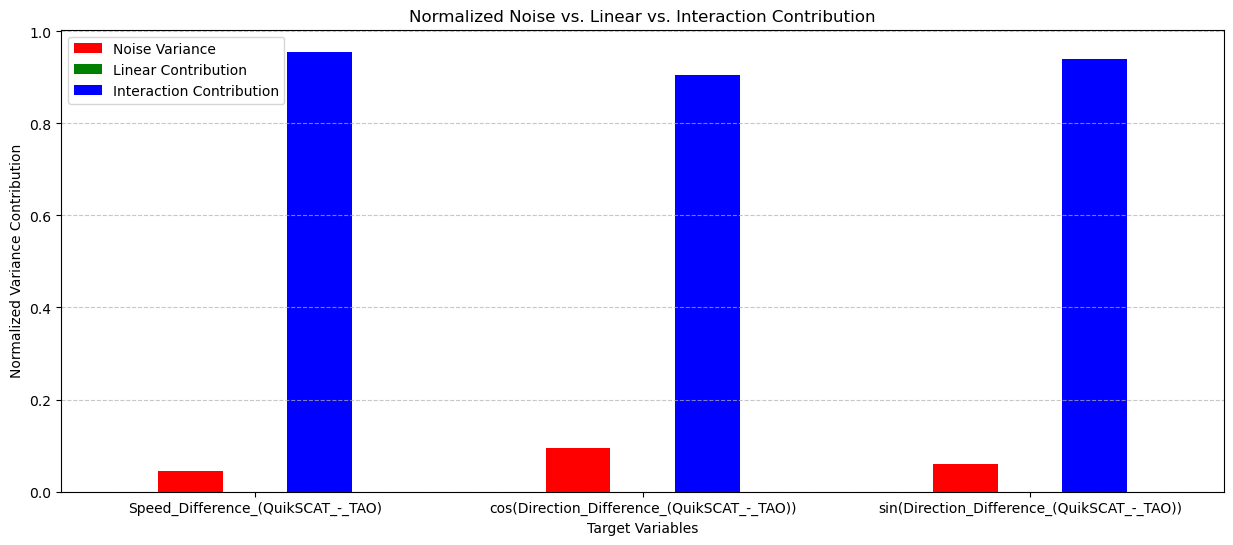

In [12]:
# Normalize the variance so that each column sums to 1
variance_df_normalized = variance_df.div(variance_df.sum(axis=1), axis=0)

# Plot results
variance_df_normalized.plot(kind='bar', figsize=(15, 6), color=['red', 'green', 'blue'])

# Customize the plot
plt.title("Normalized Noise vs. Linear vs. Interaction Contribution")
plt.ylabel("Normalized Variance Contribution")
plt.xlabel("Target Variables")
plt.xticks(rotation=0)
plt.legend(["Noise Variance", "Linear Contribution", "Interaction Contribution"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

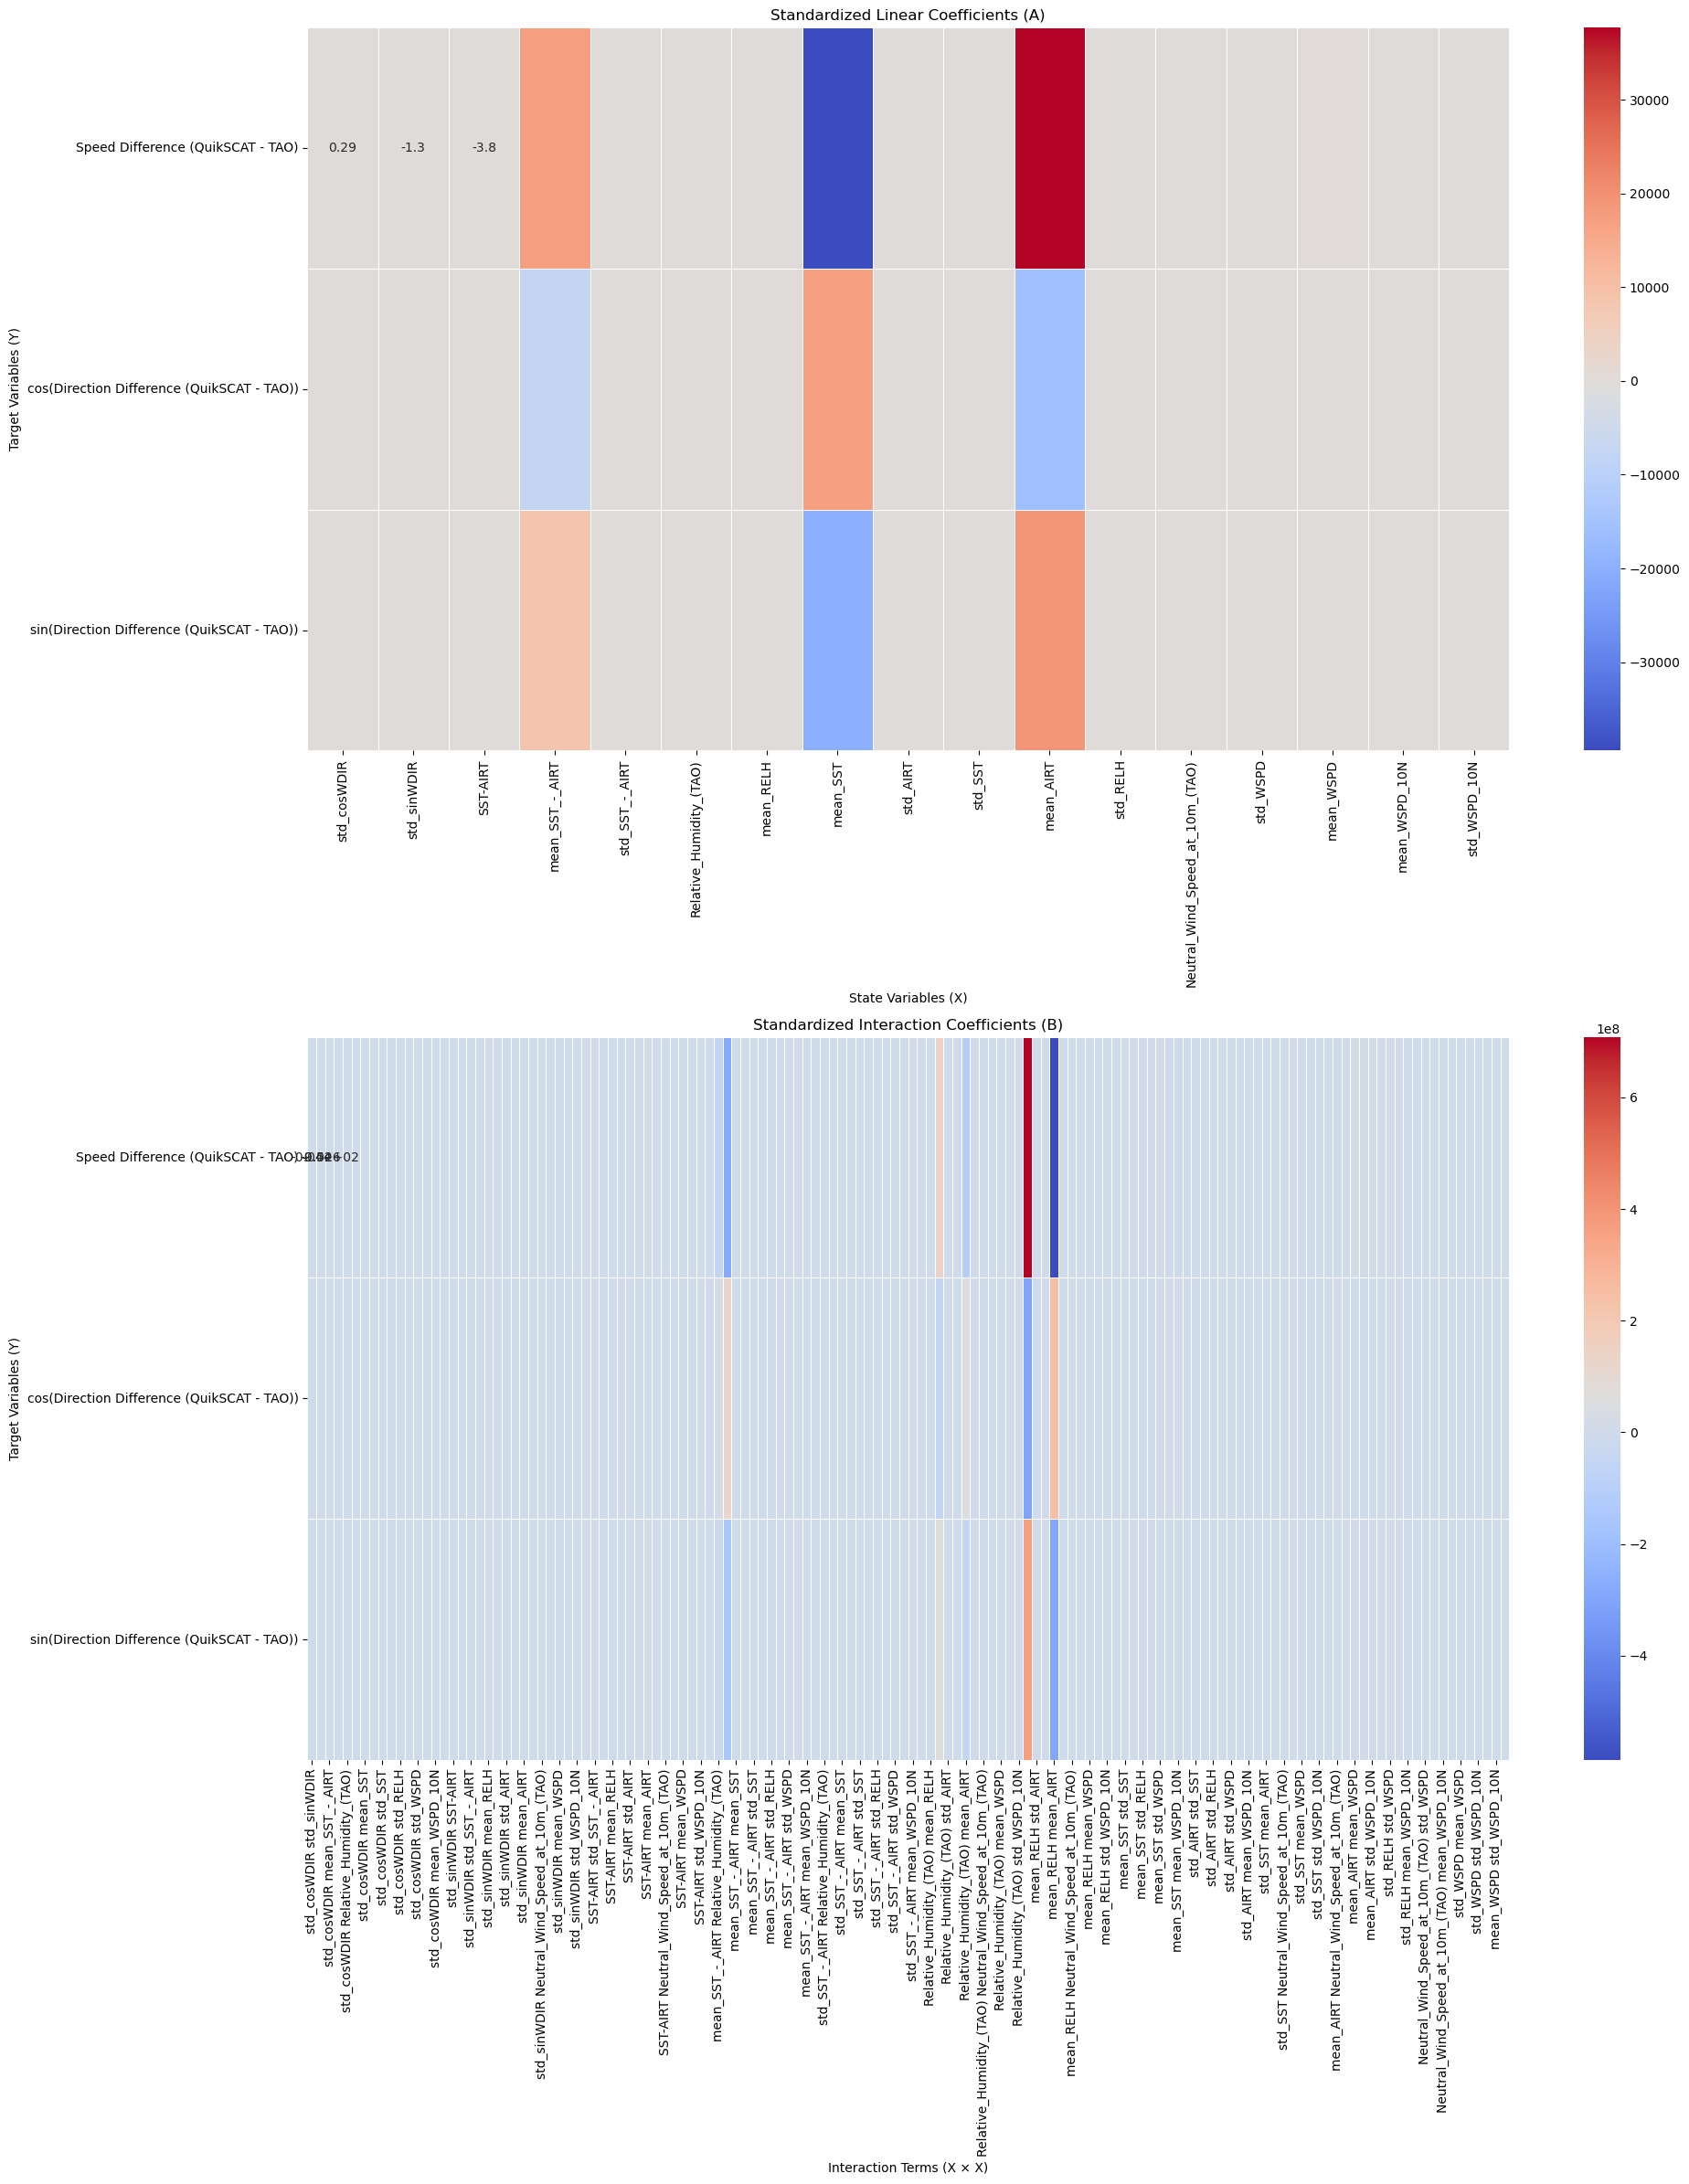

In [13]:
# Compute standardized coefficients (multiply coefficient by feature std dev)
A_std = A_matrix * X.std(axis=0).to_numpy()  # Ensure broadcasting works
B_std = B_matrix * X_interactions_only.std(axis=0)

# Convert to DataFrames using correct row and column names
A_std_df = pd.DataFrame(A_std, columns=X.columns, index=Yheadings)  # Fix row index
B_std_df = pd.DataFrame(B_std, columns=interaction_feature_names, index=Yheadings)  # Fix row index

plt.figure(figsize=(20, 24))

# Plot heatmap for standardized linear coefficients (A_std_df)
plt.subplot(2, 1, 1)
sns.heatmap(A_std_df, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Standardized Linear Coefficients (A)")
plt.xlabel("State Variables (X)")
plt.ylabel("Target Variables (Y)")

# Plot heatmap for standardized interaction coefficients (B_std_df)
plt.subplot(2, 1, 2)
sns.heatmap(B_std_df, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Standardized Interaction Coefficients (B)")
plt.xlabel("Interaction Terms (X × X)")
plt.ylabel("Target Variables (Y)")

# Adjust layout
plt.tight_layout()
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor

nestimators = 500
# Fit a Random Forest for each Y variable
rf_speed = RandomForestRegressor(n_estimators=nestimators, random_state=42, n_jobs=-1)
rf_cos_direction = RandomForestRegressor(n_estimators=nestimators, random_state=42, n_jobs=-1)
rf_sin_direction = RandomForestRegressor(n_estimators=nestimators, random_state=42, n_jobs=-1)

rf_speed.fit(X, Y.iloc[:, 0])  # Fit to speed difference
rf_cos_direction.fit(X, Y.iloc[:, 1])  # Fit to direction difference
rf_sin_direction.fit(X, Y.iloc[:, 2])  # Fit to direction difference

# Get feature importance
importances_speed = rf_speed.feature_importances_
importances_cos_direction = rf_cos_direction.feature_importances_
importances_sin_direction = rf_sin_direction.feature_importances_

# Create DataFrame for interpretation
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Speed Difference Importance': importances_speed,
    'sin Direction Difference Importance': importances_sin_direction,
    'cos Direction Difference Importance': importances_cos_direction
}).sort_values(by='Speed Difference Importance', ascending=False)

#tools.display_dataframe_to_user(name="Random Forest Feature Importance", dataframe=importance_df)

ValueError: Found input variables with inconsistent numbers of samples: [148300, 30738]

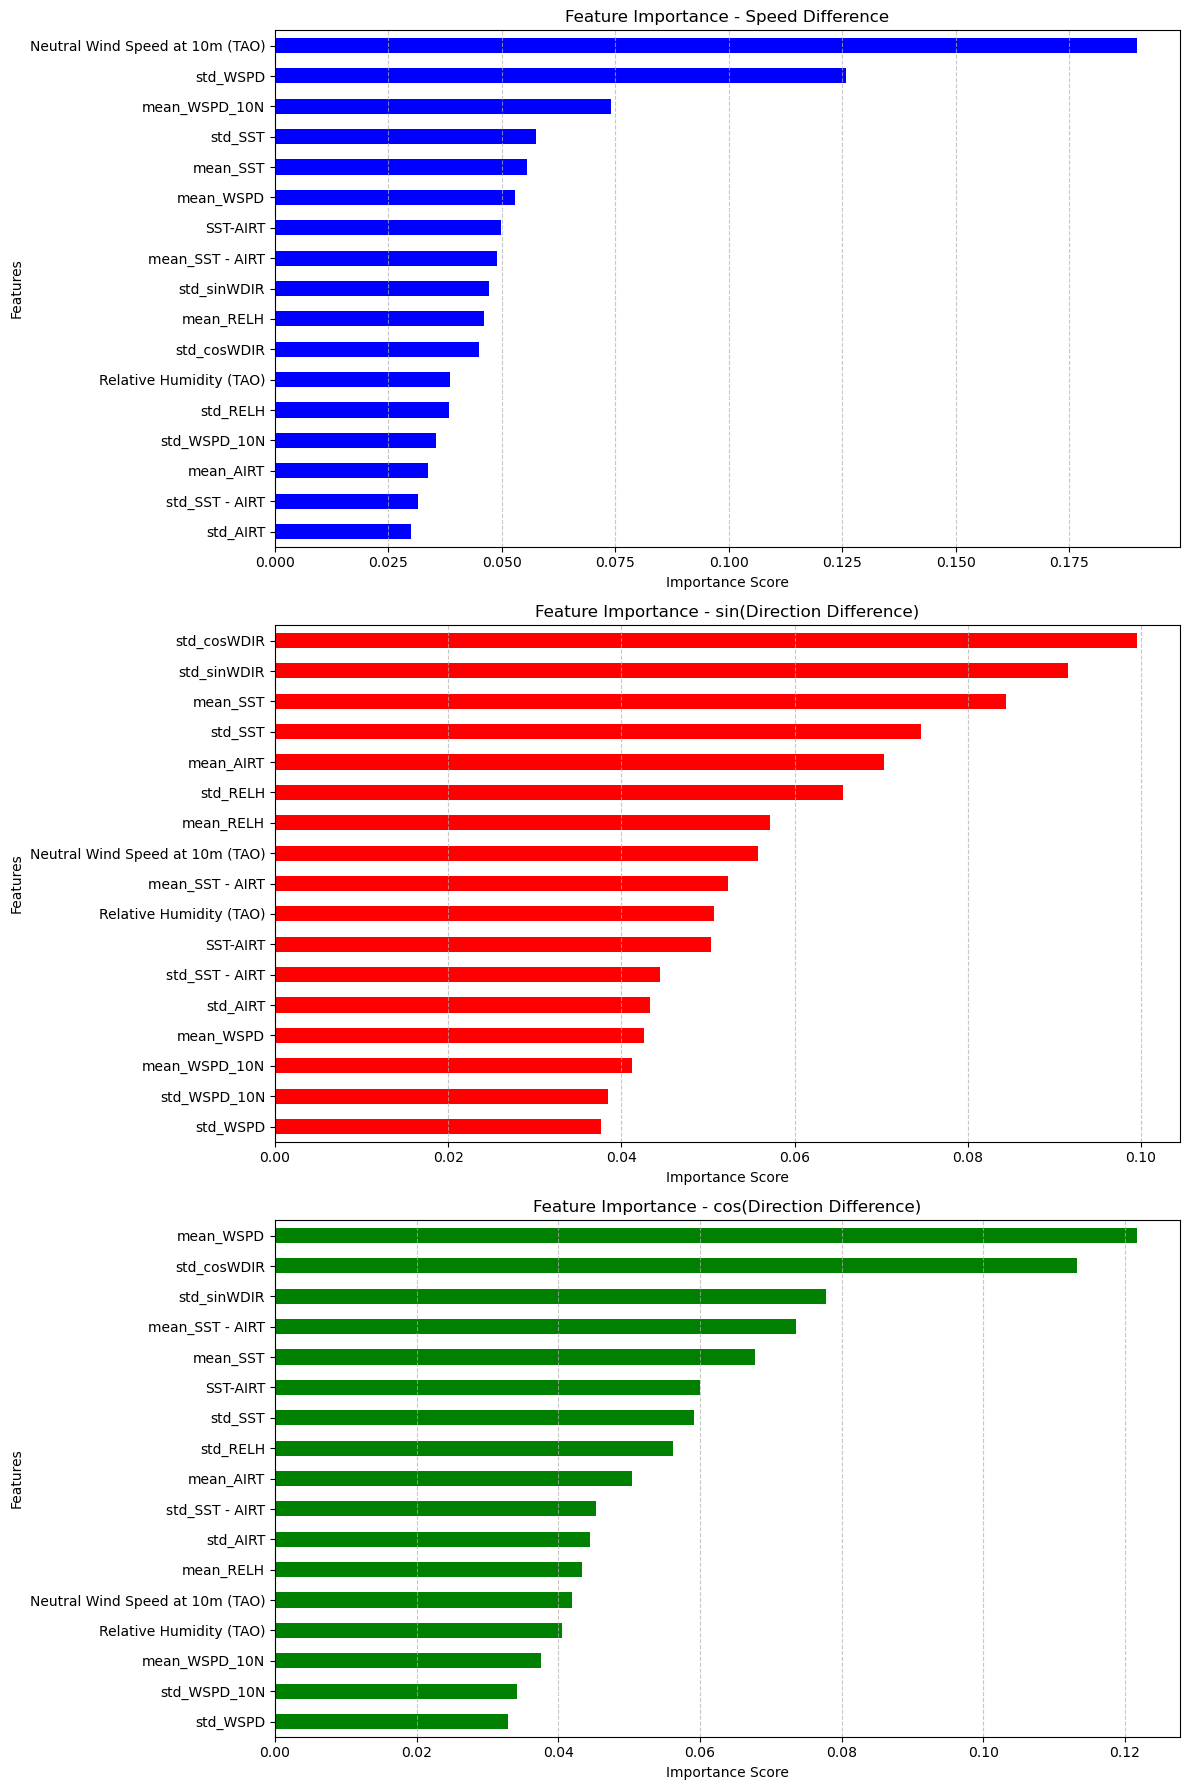

In [23]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Speed Difference Importance': importances_speed,
    'sin Direction Difference Importance': importances_sin_direction,
    'cos Direction Difference Importance': importances_cos_direction
}).set_index('Feature')

# Sort values for better visualization
importance_df_sorted = importance_df.sort_values(by='Speed Difference Importance', ascending=False)

# Plot feature importance for each target variable
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Function to plot horizontal bar charts
def plot_feature_importance(ax, importance_series, title, color):
    importance_series.sort_values().plot(kind='barh', ax=ax, color=color)
    ax.set_title(title)
    ax.set_xlabel("Importance Score")
    ax.set_ylabel("Features")
    ax.grid(axis="x", linestyle="--", alpha=0.7)

# Speed Difference Importance
plot_feature_importance(axes[0], importance_df_sorted['Speed Difference Importance'], 
                        "Feature Importance - Speed Difference", "blue")

# sin(Direction Difference) Importance
plot_feature_importance(axes[1], importance_df_sorted['sin Direction Difference Importance'], 
                        "Feature Importance - sin(Direction Difference)", "red")

# cos(Direction Difference) Importance
plot_feature_importance(axes[2], importance_df_sorted['cos Direction Difference Importance'], 
                        "Feature Importance - cos(Direction Difference)", "green")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

Text(0.1, 0.95, 'B')

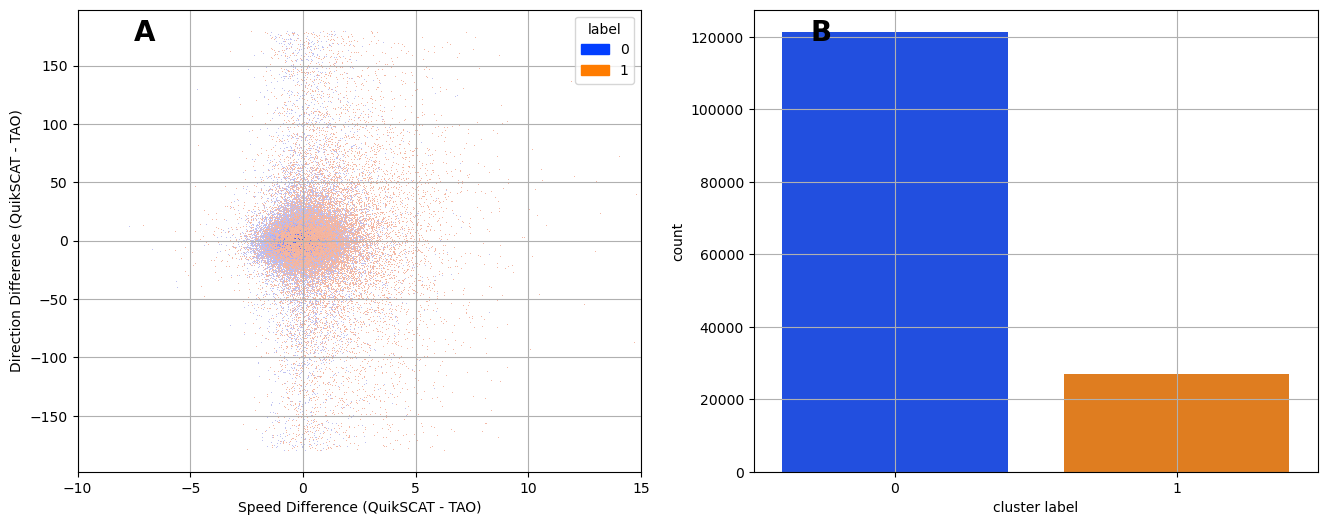

In [24]:
subDF = df.copy()
subDF['SST-AIRT'] = subDF['Sea Surface Temperature (TAO)'] - subDF['Air Temperature (TAO)']
selectX = ['std_cosWDIR', 
            'std_sinWDIR',
            'SST-AIRT',
            'mean_SST - AIRT',
            'std_SST - AIRT', 
            'Relative Humidity (TAO)',             
            'mean_RELH',             
            'mean_SST',
            'std_AIRT',
            'std_SST', 
            'mean_AIRT',
            'std_RELH',
            'Neutral Wind Speed at 10m (TAO)',
            'std_WSPD', 
            'mean_WSPD',
            'mean_WSPD_10N',
            'std_WSPD_10N']


X = subDF[selectX]

normX = (X - X.mean(axis=0))/ X.std(axis=0)

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto", max_iter = 10000).fit(normX)
subDF['label'] = kmeans.labels_

# dbscan = DBSCAN(eps=10, min_samples= 500)
# subDF['label'] = dbscan.fit_predict(normX)

# optics = OPTICS(min_samples=50 ) #cluster_method='dbscan', eps=0.25)
# df['label'] = optics.fit_predict(normX)

fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

ax = axes[0]
# ax.remove()  # Remove the existing second subplot
# ax = fig.add_subplot(121, projection='polar')
xlabel = 'Speed Difference (QuikSCAT - TAO)'
ylabel = 'Direction Difference (QuikSCAT - TAO)'

s = sns.histplot(subDF, x=xlabel, y = ylabel,#levels=10, 
                hue='label', common_norm=True, cbar = False,
                palette = sns.color_palette("bright"), ax = ax)

ax.grid(visible=True, which='both', axis='both')

ax.text(0.1, 0.95, 'A', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)

ax.set_xlim(-10,15)

ax = axes[1]
s = sns.countplot(subDF, x='label',palette = sns.color_palette("bright"), ax = ax)

ax.grid(visible=True, which='both', axis='both')
ax.set_xlabel('cluster label')
#ax.set_ylabel('cluster label')

ax.text(0.1, 0.95, 'B', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)


#plt.savefig('PDF_byCluster_10min.png', dpi=100)

In [17]:
mean_by_label = subDF.groupby('label')['Speed Difference (QuikSCAT - TAO)'].mean()
print(mean_by_label)

label
0   -0.049362
1    1.033139
Name: Speed Difference (QuikSCAT - TAO), dtype: float64


In [18]:
mean_by_label = subDF.groupby('label')['Speed Difference (QuikSCAT - TAO)'].std()
print(mean_by_label)

label
0    0.798452
1    1.865720
Name: Speed Difference (QuikSCAT - TAO), dtype: float64


In [19]:
dir_mean_by_label = ssubDF.groupby('label')['Direction Difference (QuikSCAT - TAO)'].mean()
print(dir_mean_by_label)

NameError: name 'ssubDF' is not defined